<a href="https://colab.research.google.com/github/muralinarra/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project is about National Obesity Percentages by State Obesity column state that the percent of the state population that is considered obese from the 2015 CDC BRFSS Survey.

The National Obsesity Percentages dataset is collected from the data.gov. And also related files about Postal code is taken from "Boy Scouts Of America" website

The main purpose of this project is to Examine :

1.Plot the univariate plots like hiostogram and box plot to know the distribution of each attribute in the dataframe

2.Which state has the highest Obesity rate with postal code

3.Which state has the lowest Obesity rate with postal code

4.What is the average obesity rate accross all states

5.Which state has the obesity rate above the national average

6.What is the rank order of states based on obesity rates

7.Are there are any states with similar obesity rate

8.Visualize the obesity rates across different states using a bar chart and pie chart

9.Plot the Scatter plot of Obesity vs Population

This project give the best idea about obesity trends in the 2015

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ObesityData = pd.read_csv('https://data-lakecountyil.opendata.arcgis.com/datasets/lakecountyil::national-obesity-by-state.csv?where=1=1&outSR=%7B%22latestWkid%22%3A3435%2C%22wkid%22%3A102671%7D')
# Display the data
ObesityData.head()

,FID,NAME,Obesity,SHAPE_Length,SHAPE_Area
0,1,Texas,32.4,1.540832e+07,7.672329e+12
1,2,California,24.2,1.451870e+07,5.327809e+12
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12
3,4,Georgia,30.7,5.795596e+06,1.652980e+12
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12


In [40]:
def findNullValues(data):
    """
    (Dataframe)->(Series)
    """
    return data.isnull().any()

In [41]:
findNullValues(ObesityData)

FID             False
NAME            False
Obesity         False
SHAPE_Length    False
SHAPE_Area      False
dtype: bool

In [42]:
# Description of each attribute in the dataset like mean, count, min and max
ObesityData.describe()

,FID,Obesity,SHAPE_Length,SHAPE_Area
count,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,26.500000,29.286538,6.294282e+06,1.724137e+12
std,15.154757,3.832832,3.068681e+06,1.455130e+12
min,1.000000,20.200000,0.000000e+00,0.000000e+00
25%,13.750000,26.250000,5.022132e+06,8.299946e+11
50%,26.500000,29.800000,6.445438e+06,1.492228e+12
75%,39.250000,31.475000,7.747383e+06,2.245753e+12
max,52.000000,36.200000,1.540832e+07,7.672329e+12


In [43]:
# Gives the shape of the dataframe
ObesityData.shape

(52, 5)

In [44]:
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
res = requests.get('https://www.scouting.org/resources/los/states/', headers=headers)
postalCode = pd.read_html(res.text)
postalCodes = postalCode[0]
# Display the data
postalCodes.head()

,State,Standard,Postal
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [45]:
# Calls the function to check it there are null values present or not
findNullValues(postalCodes)

State       False
Standard    False
Postal      False
dtype: bool

In [46]:
# Checks the shape of postalCodes dataframe
postalCodes.shape

(55, 3)

In [47]:
obesityMergedData = pd.merge(ObesityData, postalCodes, left_on='NAME', right_on='State')
# Display the data
obesityMergedData.head()

,FID,NAME,Obesity,SHAPE_Length,SHAPE_Area,State,Standard,Postal
0,1,Texas,32.4,1.540832e+07,7.672329e+12,Texas,Texas,TX
1,2,California,24.2,1.451870e+07,5.327809e+12,California,Calif.,CA
2,3,Kentucky,34.6,6.346699e+06,1.128830e+12,Kentucky,Ky.,KY
3,4,Georgia,30.7,5.795596e+06,1.652980e+12,Georgia,Ga.,GA
4,5,Wisconsin,30.7,6.806782e+06,1.567816e+12,Wisconsin,Wis.,WI


In [48]:
# Checks the shape of two merged files
obesityMergedData.shape

(52, 8)

In [49]:
# Drops the dumy columns
obesityMergedData = obesityMergedData.drop(columns = ['NAME', 'Standard'], axis=1)
# Display the data
obesityMergedData.head()

,FID,Obesity,SHAPE_Length,SHAPE_Area,State,Postal
0,1,32.4,1.540832e+07,7.672329e+12,Texas,TX
1,2,24.2,1.451870e+07,5.327809e+12,California,CA
2,3,34.6,6.346699e+06,1.128830e+12,Kentucky,KY
3,4,30.7,5.795596e+06,1.652980e+12,Georgia,GA
4,5,30.7,6.806782e+06,1.567816e+12,Wisconsin,WI


In [50]:
# Gives the shape
obesityMergedData.shape

(52, 6)

In [51]:
population = pd.read_html('https://www.factmonster.com/us/states/state-population-by-rank-2015')
populationData = population[0]
# Display the data
populationData.head()

,0,1
0,California,39144818
1,Texas,27469114
2,Florida,20271272
3,New York,19795791
4,Illinois,12859995


In [52]:
# Assign the columns to the dataframe
populationData.columns=['State', 'Population']
# Display the data
populationData.head()

,State,Population
0,California,39144818
1,Texas,27469114
2,Florida,20271272
3,New York,19795791
4,Illinois,12859995


Merge the 2015 USA states population data to the main Obesity data

In [53]:
# Merging all 3 files
obesityCompleteData = pd.merge(obesityMergedData, populationData, on='State', how='left')
# Display the data
obesityCompleteData.head()

,FID,Obesity,SHAPE_Length,SHAPE_Area,State,Postal,Population
0,1,32.4,1.540832e+07,7.672329e+12,Texas,TX,27469114.0
1,2,24.2,1.451870e+07,5.327809e+12,California,CA,39144818.0
2,3,34.6,6.346699e+06,1.128830e+12,Kentucky,KY,4425092.0
3,4,30.7,5.795596e+06,1.652980e+12,Georgia,GA,10214860.0
4,5,30.7,6.806782e+06,1.567816e+12,Wisconsin,WI,5771337.0


In [55]:
Gives the shape of the dataframe
obesityCompleteData.shape

SyntaxError: ignored

In [56]:
# Calls the function
findNullValues(obesityCompleteData)

FID             False
Obesity         False
SHAPE_Length    False
SHAPE_Area      False
State           False
Postal          False
Population       True
dtype: bool

In [57]:
# Filling the null values with the mean of the population
obesityCompleteData = obesityCompleteData.fillna(obesityCompleteData['Population'].mean())

In [58]:
# calls the function to check the null values present or not
findNullValues(obesityCompleteData)

FID             False
Obesity         False
SHAPE_Length    False
SHAPE_Area      False
State           False
Postal          False
Population      False
dtype: bool

In [59]:
# Display the end data
obesityCompleteData.tail()

,FID,Obesity,SHAPE_Length,SHAPE_Area,State,Postal,Population
47,48,34.2,6.540498e+06,2.340366e+12,Kansas,KS,2911641.0
48,49,25.1,2.653732e+06,2.789313e+11,Vermont,VT,626042.0
49,50,25.6,2.599119e+06,2.246065e+11,New Jersey,NJ,8958013.0
50,51,31.0,5.872756e+06,2.013152e+12,North Dakota,ND,756927.0
51,52,26.3,2.674767e+06,2.705294e+11,New Hampshire,NH,1330608.0


1 - Plot the univariate plots like hiostogram and box plot to know the distribution of each attribute in the dataframe

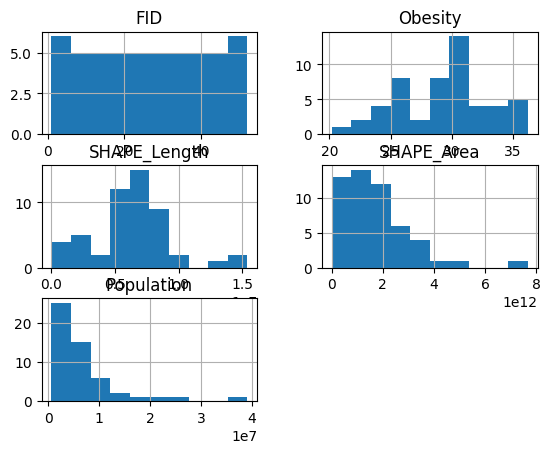

In [60]:
# Histogram gives the idea about the distribution and behaviour of data
obesityCompleteData.hist()
plt.show()

1.1 - Ploting the box plot to know the outliers found in the data

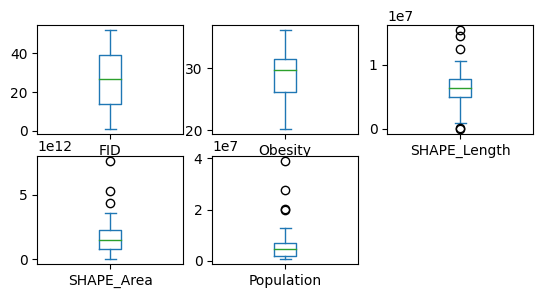

In [61]:
# Ploting the box plot as it gives the idea about distribution of data in each attribute
obesityCompleteData.plot(kind='box', subplots=True, layout=(3,3), sharex=True, sharey=False)
plt.show()

1 - The State that has the highest Obesity rate with postal code

In [62]:
def maxObesityState(data):
    """
    (dataframe)-> Series

    Function accepts one input parament dataframe and returns the Series after
    computing the highest Obesity rate
    """
    maxobesitystate = data.loc[data['Obesity'].idxmax(), ['State', 'Postal']]
    return maxobesitystate


In [63]:
print("State with the highest obesity rate:\n", maxObesityState(obesityCompleteData).to_string())

State with the highest obesity rate:
 State     Louisiana
Postal           LA


2 - The state that has the lowest Obesity rate with postal code

In [64]:
def minObesityState(data):
    """
    (dataframe)-> Series

    Function accepts one input parament dataframe and returns the Series after
    computing the lowest Obesity rate
    """
    minobesitystate = data.loc[data['Obesity'].idxmin(), ['State', 'Postal']]
    return minobesitystate

In [65]:
print("State with the lowset obesity rate:\n", minObesityState(obesityCompleteData).to_string())

State with the lowset obesity rate:
 State     Colorado
Postal          CO


3 - The average obesity rate accross all states

In [66]:
def averageObesityRate(data):
    """
    (dataframe)-> Integer

    Function accepts one input parament dataframe and returns the Integer after
    computing the mean of Obesity rate
    """
    averageobesityrate = data['Obesity'].mean()
    return averageobesityrate

In [67]:
averageobesityrate = averageObesityRate(obesityCompleteData)
print("Average obesity rate across all states : ", averageobesityrate)

Average obesity rate across all states :  29.28653846153846


4 - The states that has the obesity rate above the national average

In [68]:
def aboveAverageStates(data):
    """
    (dataframe)-> String

    Function accepts one input parament dataframe and returns the String after
    computing the states with Obesity rate above national average
    """
    aboveaveragestates = data[data['Obesity'] > averageobesityrate]['State']
    return aboveaveragestates

In [69]:
print("States with obesity rate above the national average : ", aboveAverageStates(obesityCompleteData).tolist())

States with obesity rate above the national average :  ['Texas', 'Kentucky', 'Georgia', 'Wisconsin', 'Oregon', 'Tennessee', 'Louisiana', 'Michigan', 'Alaska', 'Nebraska', 'Ohio', 'Illinois', 'Missouri', 'Iowa', 'South Dakota', 'Arkansas', 'Mississippi', 'North Carolina', 'Oklahoma', 'West Virginia', 'Indiana', 'Alabama', 'Puerto Rico', 'South Carolina', 'Maine', 'Delaware', 'Pennsylvania', 'Kansas', 'North Dakota']


5 - The rank order of states based on obesity rates

In [70]:
rankeddata = obesityCompleteData.sort_values(by='Obesity', ascending=False)
print("Rank order of states based on obesity rates:")
print(rankeddata[['State', 'Obesity']].reset_index(drop=True))

Rank order of states based on obesity rates:
                   State  Obesity
0              Louisiana     36.2
1                Alabama     35.6
2            Mississippi     35.6
3          West Virginia     35.6
4               Kentucky     34.6
5               Arkansas     34.5
6                 Kansas     34.2
7               Oklahoma     33.9
8              Tennessee     33.8
9                  Texas     32.4
10              Missouri     32.4
11                  Iowa     32.1
12        South Carolina     31.7
13              Nebraska     31.4
14               Indiana     31.3
15              Michigan     31.2
16          North Dakota     31.0
17              Illinois     30.8
18             Wisconsin     30.7
19               Georgia     30.7
20          South Dakota     30.4
21        North Carolina     30.1
22                Oregon     30.1
23          Pennsylvania     30.0
24                 Maine     30.0
25                  Ohio     29.8
26                Alaska     29.8
27 

6 - The states with similar obesity rate

In [71]:
def aboveAverageStates(data):
    """
    (dataframe)-> Series

    Function accepts one input parament dataframe and returns the Series after
    computing the states with similar obesity rates
    """
    similarobesitystates = data[data.duplicated(subset=['Obesity'], keep=False)]['State']
    return similarobesitystates

In [72]:
print("States with similar obesity rates:", aboveAverageStates(obesityCompleteData).tolist())

States with similar obesity rates: ['Texas', 'Georgia', 'Wisconsin', 'Oregon', 'Alaska', 'Ohio', 'Missouri', 'Mississippi', 'North Carolina', 'West Virginia', 'Alabama', 'Maine', 'Pennsylvania']


Plotting the obesity rates across different states using a bar chart

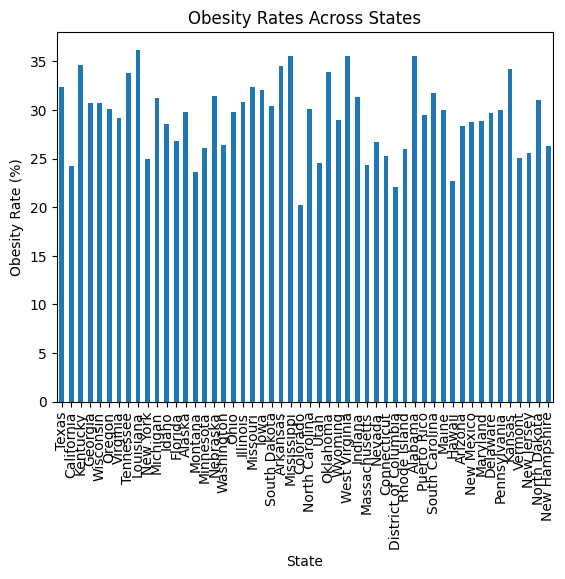

In [73]:
obesityCompleteData.plot(kind='bar', x='State', y='Obesity', legend=False)
plt.title('Obesity Rates Across States')
plt.xlabel('State')
plt.ylabel('Obesity Rate (%)')
plt.show()

Ploting the scatter points for respective states

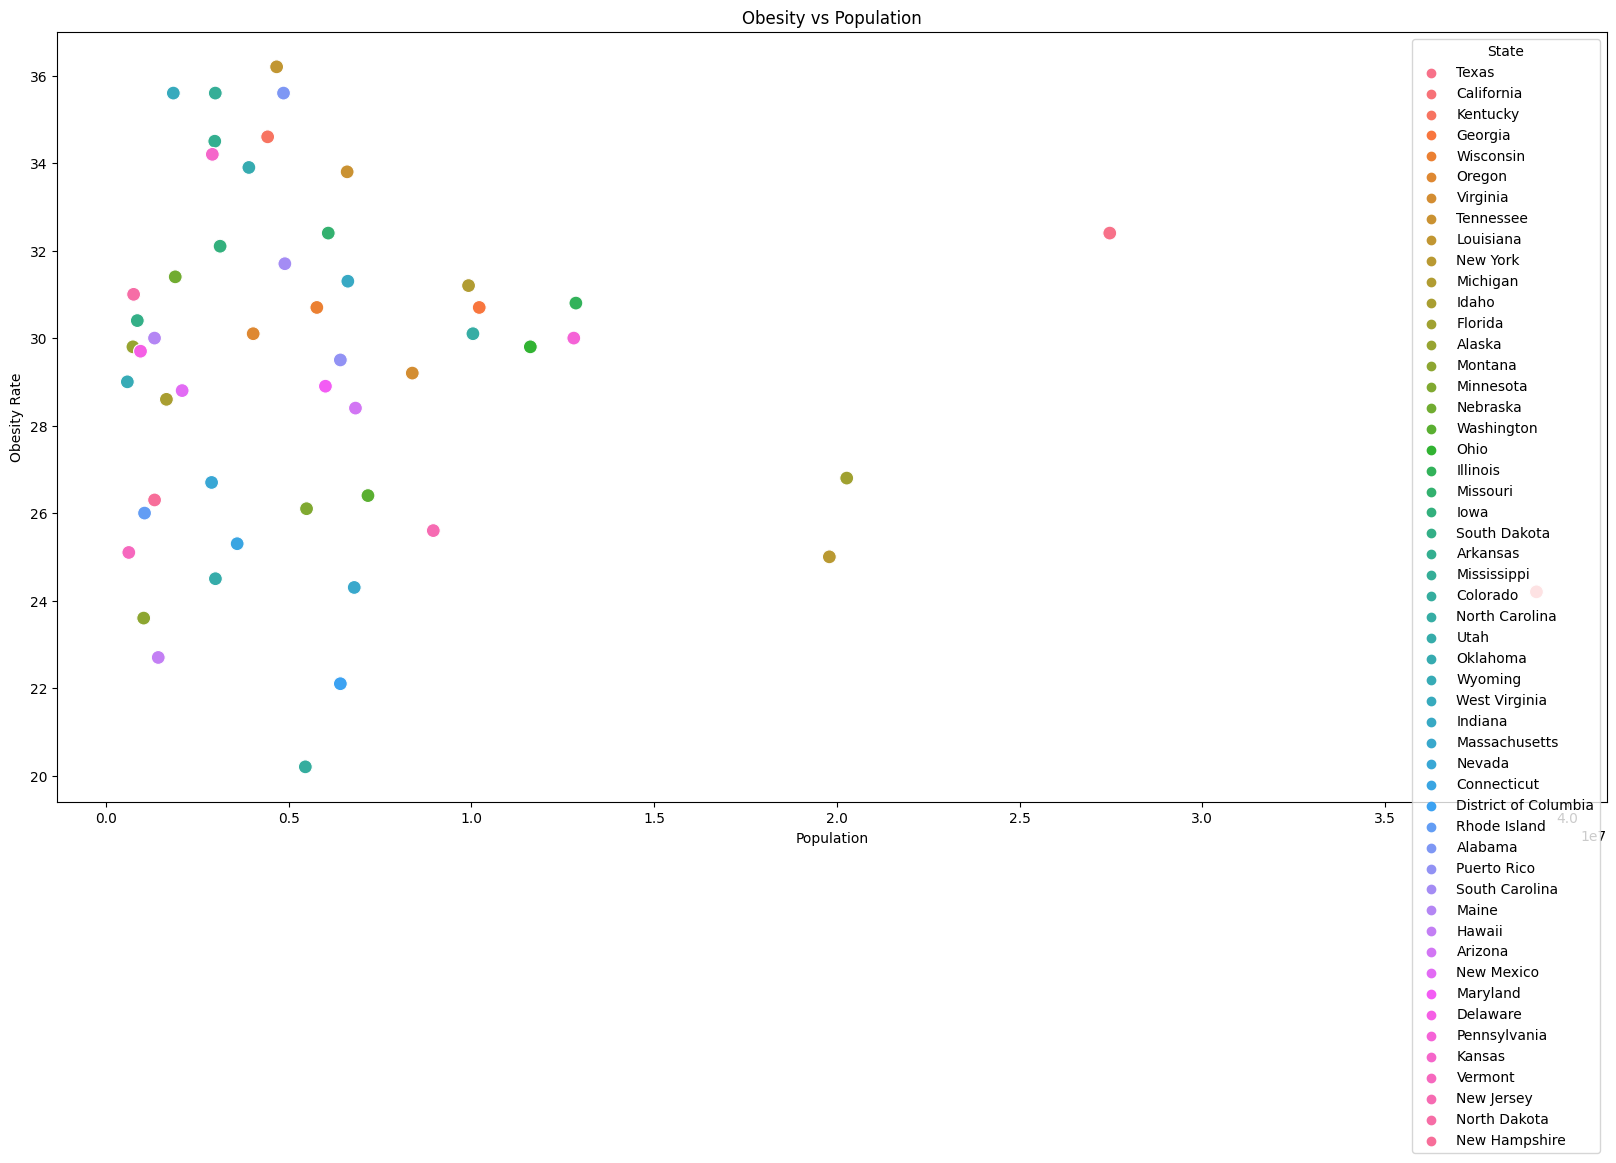

In [74]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Population', y='Obesity', data=obesityCompleteData, hue='State', s=100)
plt.title('Obesity vs Population')
plt.xlabel('Population')
plt.ylabel('Obesity Rate')
plt.show()
